In [1]:
import json
import numpy as np
with open("/home/logicrays/Desktop/botpress/files/shapy/contour_data.json") as f:
    data = json.load(f)

arr = np.array(data["array"], dtype=np.uint8)

KeyError: 'array'

In [2]:
5+9

14

In [3]:
import json
import numpy as np
with open("/home/logicrays/Desktop/botpress/files/shapy/contour_data.json") as f:
    data = json.load(f)

# arr = np.array(data["contours"], dtype=np.uint8)

In [4]:
data['contours'][7][42:67]

[[[243, 206]],
 [[241, 204]],
 [[241, 183]],
 [[242, 182]],
 [[242, 160]],
 [[241, 159]],
 [[241, 129]],
 [[242, 128]],
 [[242, 111]],
 [[241, 110]],
 [[241, 103]],
 [[242, 102]],
 [[242, 85]],
 [[243, 84]],
 [[242, 85]],
 [[242, 102]],
 [[241, 103]],
 [[241, 110]],
 [[242, 111]],
 [[242, 128]],
 [[241, 129]],
 [[189, 129]],
 [[188, 128]],
 [[188, 40]],
 [[189, 39]]]

➡ x: [190 188 188 187  92  91  91  92 124 125 126 125 124  92  91  91  92 108
  92  91  91  92 187 188 188 186 187 240 241 241 242 242 241 241 243 250
 251 252 253 252 251 250 243 241 241 242 242 241 241 242 242 241 241 242
 242 243 242 242 241 241 242 242 241 189 188 188 189 211 189 188 188 190
 241 242 242 241 241 241 242 242 243 275 243 242 242 243 383 384 384 383
 357 383 384 384 383 291 290 291 383 384 385 386 385 384 384 385 408 385
 384 384 385 528 529 529 528 446 528 529 529 528 528 528 529 529 528 529
 529 528 242 241]


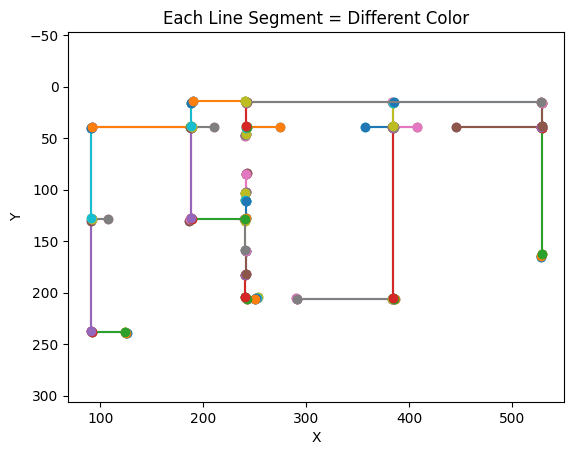

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)
# contour = np.array(data['contours'][3], dtype=np.int32)

# Remove extra dimension -> (N, 2)
points = contour.reshape(-1, 2)

x = points[:, 0]
print('➡ x:', x)
y = points[:, 1]

# plt.figure()
# plt.plot(x, y, '-o')   # line + points
# plt.gca().invert_yaxis()  # important for image coordinates
# plt.axis('equal')
# plt.title("Contour Plot")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()


###################
import numpy as np
import matplotlib.pyplot as plt

points = contour.reshape(-1, 2)

plt.figure()

for i in range(len(points) - 1):
    x = [points[i, 0], points[i + 1, 0]]
    y = [points[i, 1], points[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


IndexError: index 40 is out of bounds for axis 0 with size 40

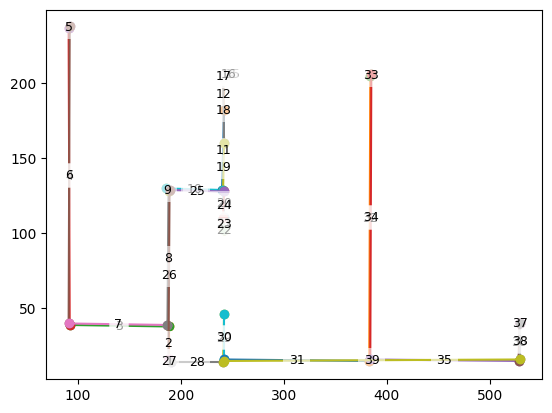

In [112]:
import numpy as np
import matplotlib.pyplot as plt

points = con#tour.reshape(-1, 2)

plt.figure()

for idx in range(81):#(len(points) - 1):
    x1, y1 = points[idx]
    x2, y2 = points[idx + 1]

    # Draw segment (auto color)
    plt.plot([x1, x2], [y1, y2], '-o')

    # Midpoint of the line
    mx = (x1 + x2) / 2
    my = (y1 + y2) / 2

    # Print line number
    plt.text(
        mx, my,
        str(idx + 1),
        color="black",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Line Segments with Index Numbers")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [110]:
con[39:60]

array([[243, 206],
       [241, 204],
       [241, 183],
       [242, 182],
       [242, 160],
       [241, 159],
       [241, 129],
       [242, 128],
       [242, 111],
       [241, 110],
       [241, 103],
       [242, 102],
       [242,  85],
       [242,  85],
       [242, 102],
       [241, 103],
       [241, 110],
       [242, 111],
       [242, 128],
       [241, 129],
       [189, 129]], dtype=int32)

In [18]:
import numpy as np

# contour shape: (N, 1, 2)
points = contour.reshape(-1, 2)   # -> (N, 2)

# sort by X value
sorted_points = points[np.argsort(points[:, 0])]

# (optional) convert back to contour shape
sorted_contour = sorted_points.reshape(-1, 1, 2)

# print(sorted_contour[3:23])

In [94]:
import numpy as np
import math



def clean_polyline(
    points,
    min_segment_len=3.0,     # remove tiny connections (px)
    angle_threshold=10.0     # degrees, for collinearity
):
    """
    points: (N,2) numpy array
    returns: cleaned (M,2) numpy array
    """

    def dist(p1, p2):
        return math.hypot(p2[0] - p1[0], p2[1] - p1[1])

    def angle(p0, p1, p2):
        v1 = p0 - p1
        v2 = p2 - p1
        dot = np.dot(v1, v2)
        n = np.linalg.norm(v1) * np.linalg.norm(v2)
        if n == 0:
            return 0
        return math.degrees(math.acos(np.clip(dot / n, -1, 1)))

    # ---- STEP 1: remove very small segments
    filtered = [points[0]]
    for p in points[1:]:
        if dist(filtered[-1], p) >= min_segment_len:
            filtered.append(p)
    filtered = np.array(filtered)

    # ---- STEP 2: remove A -> B -> A oscillations
    stable = [filtered[0]]
    for i in range(1, len(filtered) - 1):
        prev = stable[-1]
        curr = filtered[i]
        nxt = filtered[i + 1]

        if dist(prev, nxt) < min_segment_len:
            continue  # skip jitter
        stable.append(curr)

    stable.append(filtered[-1])
    stable = np.array(stable)

    # ---- STEP 3: remove nearly collinear middle points
    final = [stable[0]]
    for i in range(1, len(stable) - 1):
        a = final[-1]
        b = stable[i]
        c = stable[i + 1]

        ang = angle(a, b, c)
        if abs(ang - 180) < angle_threshold:
            print('yyy')
            print('➡ ang:', ang)
            continue  # b is unnecessary
        final.append(b)

    final.append(stable[-1])
    return np.array(final)

In [111]:
con = clean_polyline(points,min_segment_len=2.0, angle_threshold=3.0)
print(len(con))

yyy
➡ ang: 179.46949868332584
yyy
➡ ang: 179.4791436254986
yyy
➡ ang: 179.41959951099795
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 179.35625428582472
yyy
➡ ang: 179.3704013915899
yyy
➡ ang: 180.0
yyy
➡ ang: 180.0
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 177.7093899573614
yyy
➡ ang: 179.6548488768354
yyy
➡ ang: 179.6589577211411
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 180.0
40


➡ poin: [[190  14]
 [188  16]
 [188  38]
 [ 92  39]
 [ 91 237]
 [ 92 238]
 [ 91  40]
 [187  39]
 [188 128]
 [186 130]
 [240 129]
 [242 182]
 [241 204]
 [243 206]
 [250 206]
 [250 206]
 [243 206]
 [241 204]
 [242 160]
 [241 129]
 [242 111]
 [241 103]
 [242 102]
 [241 110]
 [242 128]
 [189 129]
 [188  16]
 [190  14]
 [241  14]
 [242  46]
 [242  16]
 [383  15]
 [384 205]
 [385 206]
 [384  16]
 [528  15]
 [529  40]
 [529  40]
 [529  16]
 [242  15]]
➡ x: [190 188 188  92  91  92  91 187 188 186 240 242 241 243 250 250 243 241
 242 241 242 241 242 241 242 189 188 190 241 242 242 383 384 385 384 528
 529 529 529 242]


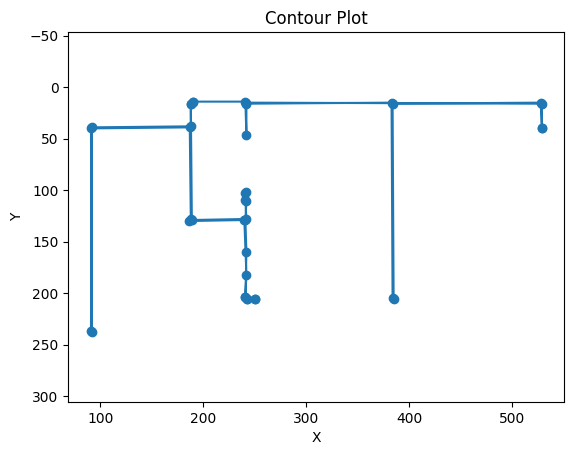

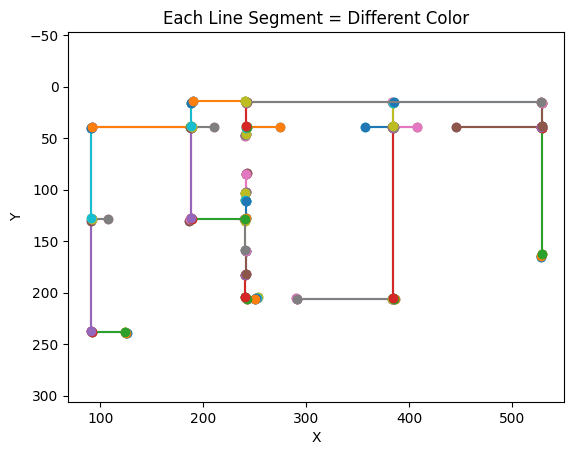

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)


# contour = np.array(data['contours'][3], dtype=np.int32)

# Remove extra dimension -> (N, 2)
poin = con#raw
print('➡ poin:', poin)
#con#tour.reshape(-1, 2)

x = poin[:, 0]
print('➡ x:', x)
y = poin[:, 1]

plt.figure()
plt.plot(x, y, '-o')   # line + poin
plt.gca().invert_yaxis()  # important for image coordinates
plt.axis('equal')
plt.title("Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# ###################
# import numpy as np
# import matplotlib.pyplot as plt

point = contour.reshape(-1, 2)

plt.figure()

for i in range(len(point) - 1):
    x = [point[i, 0], point[i + 1, 0]]
    y = [point[i, 1], point[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [61]:
import numpy as np


def clean_contour(points, error_rate=3, min_segment_length=5):
    """
    Cleans a contour/polyline by:
    1. Removing duplicate and near-duplicate points (within error_rate distance)
    2. Removing small back-and-forth oscillations (noise spikes)
    3. Merging redundant collinear segments into single clean lines

    Args:
        points     : list of [[x, y]] or [[x, y]] nested lists (raw contour data)
        error_rate : pixel tolerance — points within this distance are considered the same (default: 3)
        min_segment_length: minimum pixel length a segment must be to keep (default: 5)

    Returns:
        List of [x, y] cleaned unique points forming a single clean connection
    """

    # --- Step 1: Flatten to list of [x, y] ---
    flat = []
    for p in points:
        # Handle [[x, y]] or [x, y]
        if isinstance(p[0], (list, tuple)):
            flat.append(list(p[0]))
        else:
            flat.append(list(p))

    if len(flat) == 0:
        return []

    # --- Step 2: Remove consecutive duplicates within error_rate tolerance ---
    def dist(a, b):
        return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    deduped = [flat[0]]
    for pt in flat[1:]:
        if dist(pt, deduped[-1]) > error_rate:
            deduped.append(pt)

    if len(deduped) < 2:
        return deduped

    # --- Step 3: Remove oscillation / back-and-forth spikes ---
    # If point[i] is very close to point[i-2], the middle point is a spike — remove it
    def remove_spikes(pts, tolerance):
        changed = True
        while changed:
            changed = False
            result = [pts[0]]
            i = 1
            while i < len(pts) - 1:
                # Check if we're about to go back where we came from
                if dist(pts[i + 1], result[-1]) < tolerance:
                    # Skip pts[i] and pts[i+1] — they're a spike
                    i += 2
                    changed = True
                else:
                    result.append(pts[i])
                    i += 1
            if i < len(pts):
                result.append(pts[i])
            pts = result
        return pts

    no_spikes = remove_spikes(deduped, error_rate * 2)

    # --- Step 4: Douglas-Peucker simplification to remove redundant collinear points ---
    def point_line_distance(point, start, end):
        """Perpendicular distance from point to line segment start->end."""
        if start == end:
            return dist(point, start)
        x0, y0 = point
        x1, y1 = start
        x2, y2 = end
        num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        den = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        return num / den if den != 0 else 0

    def douglas_peucker(pts, epsilon):
        if len(pts) < 3:
            return pts
        # Find the point with the maximum distance from the line start->end
        dmax = 0
        index = 0
        for i in range(1, len(pts) - 1):
            d = point_line_distance(pts[i], pts[0], pts[-1])
            if d > dmax:
                dmax = d
                index = i

        if dmax > epsilon:
            # Recursively simplify both halves
            left  = douglas_peucker(pts[:index + 1], epsilon)
            right = douglas_peucker(pts[index:], epsilon)
            return left[:-1] + right
        else:
            # All intermediate points are within tolerance — collapse to endpoints only
            return [pts[0], pts[-1]]

    simplified = douglas_peucker(no_spikes, error_rate)

    # --- Step 5: Remove any remaining short segments ---
    final = [simplified[0]]
    for pt in simplified[1:]:
        if dist(pt, final[-1]) >= min_segment_length:
            final.append(pt)
        else:
            # Replace with midpoint to avoid losing the endpoint
            final[-1] = pt  # just advance — keeps the further point

    return final


# # ── Example usage ──────────────────────────────────────────────────────────────
# if __name__ == "__main__":
#     raw = [
#         [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]],
#         [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]],
#         [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]],
#         [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]],
#         [[242, 102]], [[242, 85]],  [[243, 84]],  [[242, 85]],  [[242, 102]],
#         [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]],
#         [[189, 129]],
#     ]



In [87]:
raw = clean_contour(points, error_rate=0.1, min_segment_length=1)
print(len(raw))

# print(f"Original points : {len(raw)}")
# print(f"Cleaned points  : {len(cleaned)}")
# print("\nCleaned contour:")
# # for p in cleaned:
# #     print(f"  {p}")

48


In [88]:
raw = np.array(raw, dtype=np.int32)

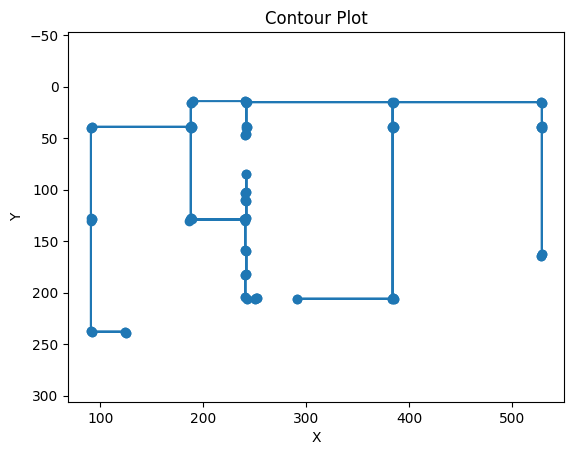

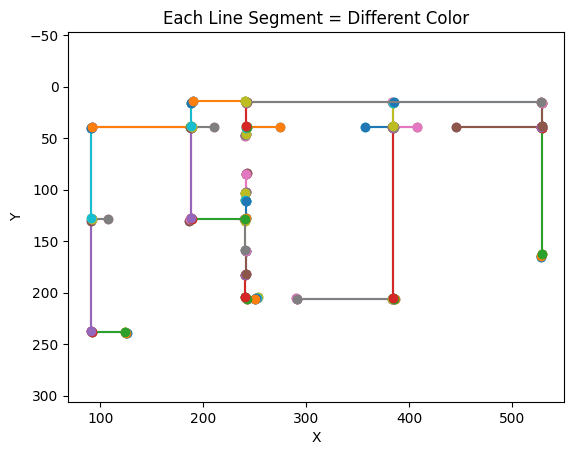

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
# contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)


contour = np.array(data['contours'][7], dtype=np.int32)

# Remove extra dimension -> (N, 2)
poin = con
#con#tour.reshape(-1, 2)

x = poin[:, 0]

y = poin[:, 1]

plt.figure()
plt.plot(x, y, '-o')   # line + poin
plt.gca().invert_yaxis()  # important for image coordinates
plt.axis('equal')
plt.title("Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# ###################
# import numpy as np
# import matplotlib.pyplot as plt

point = contour.reshape(-1, 2)

plt.figure()

for i in range(len(point) - 1):
    x = [point[i, 0], point[i + 1, 0]]
    y = [point[i, 1], point[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [107]:
con[40:60]

array([[241, 204],
       [241, 183],
       [242, 182],
       [242, 160],
       [241, 159],
       [241, 129],
       [242, 128],
       [242, 111],
       [241, 110],
       [241, 103],
       [242, 102],
       [242,  85],
       [242,  85],
       [242, 102],
       [241, 103],
       [241, 110],
       [242, 111],
       [242, 128],
       [241, 129],
       [189, 129]], dtype=int32)